## Indexing and Slicing

You can index and slice numpy arrays in the same ways you can slice Python lists.

In [1]:
import numpy as np

In [2]:
data = np.array([1,2,3])
data[1]

np.int64(2)

In [3]:
data[0:2]

array([1, 2])

In [4]:
data[:3]

array([1, 2, 3])

In [6]:
data[:-2]

array([1])

In [7]:
data[-2:]

array([2, 3])

You may want to take a section of your array or specific array elements to use in further analysis or additional operations. To do that, you’ll need to subset, slice, and/or index your arrays.

If you want to select values from your array that fulfill certain conditions, it’s straightforward with NumPy.

For example, if you start with this array:

In [8]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])


In [9]:
print(a[a<5])

[1 2 3 4]


In [13]:
five_ups = (a >= 5)
print(a[five_ups])

[ 5  6  7  8  9 10 11 12]


In [14]:
divisible_by_2 = a[a%2==0]
print(divisible_by_2)

[ 2  4  6  8 10 12]


In [15]:
c = a[(a > 2) & (a < 11)]
print(c)

[ 3  4  5  6  7  8  9 10]


In [16]:
five_up = (a > 5) | (a == 5)
print(five_up)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]


You can also use **np.nonzero()** to select elements or indices from an array.



In [17]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [18]:
b = np.nonzero(a < 5)
print(b)

(array([0, 0, 0, 0]), array([0, 1, 2, 3]))


### How to create an array from existing data

You can easily create a new array from a section of an existing array.



a = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
arr1 = a[2:8]
arr1

array([[ 9, 10, 11, 12]])

In [21]:
a1 = np.array([[1, 1],
               [2, 2]])

a2 = np.array([[3, 3],
               [4, 4]])

In [ ]:
# Vertical Stacking
np.vstack((a1, a2))


array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [23]:
# Horizontal Stacking
np.hstack((a1, a2))

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

You can split an array into several smaller arrays using **hsplit**. You can specify either the number of equally shaped arrays to return or the columns after which the division should occur.

Let’s say you have this array:



In [24]:
x = np.arange(1, 25).reshape(2, 12)
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [25]:
np.hsplit(x, 3)

[array([[ 1,  2,  3,  4],
        [13, 14, 15, 16]]),
 array([[ 5,  6,  7,  8],
        [17, 18, 19, 20]]),
 array([[ 9, 10, 11, 12],
        [21, 22, 23, 24]])]

If you wanted to split your array after the third and fourth column, you’d run:



In [26]:
np.hsplit(x, (3, 4))

[array([[ 1,  2,  3],
        [13, 14, 15]]),
 array([[ 4],
        [16]]),
 array([[ 5,  6,  7,  8,  9, 10, 11, 12],
        [17, 18, 19, 20, 21, 22, 23, 24]])]

You can use the **view** method to create a new array object that looks at the same data as the original array (a shallow copy).

Views are an important NumPy concept! NumPy functions, as well as operations like indexing and slicing, will return views whenever possible. This saves memory and is faster (no copy of the data has to be made). However it’s important to be aware of this - modifying data in a view also modifies the original array!

Let’s say you create this array:

In [27]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

Now we create an array b1 by slicing a and modify the first element of b1. This will modify the corresponding element in a as well!



In [28]:
b1 = a[0,:]
b1

array([1, 2, 3, 4])

In [29]:
b1[0] = 99
b1

array([99,  2,  3,  4])

In [30]:
a

array([[99,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Using the copy method will make a complete copy of the array and its data (a deep copy). To use this on your array, you could run:

In [32]:
b2 = a.copy()
b2

array([[99,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## Basic Array Operations

Once you’ve created your arrays, you can start to work with them. Let’s say, for example, that you’ve created two arrays, one called “data” and one called “ones”

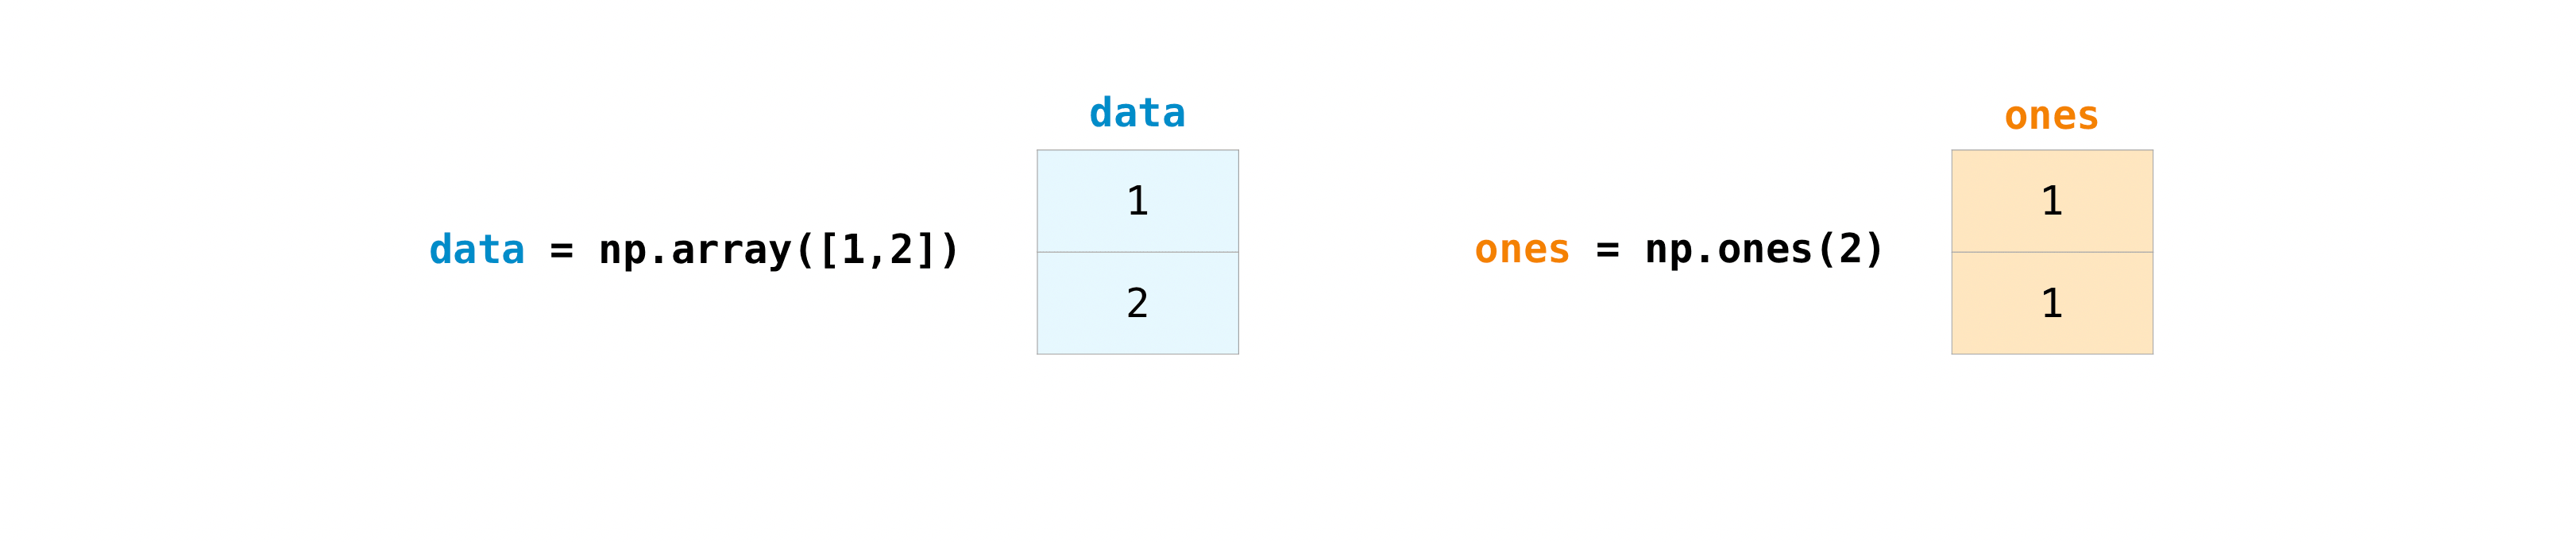

In [33]:
data = np.array([1, 2])
ones = np.ones(2, dtype=int)
data + ones

array([2, 3])

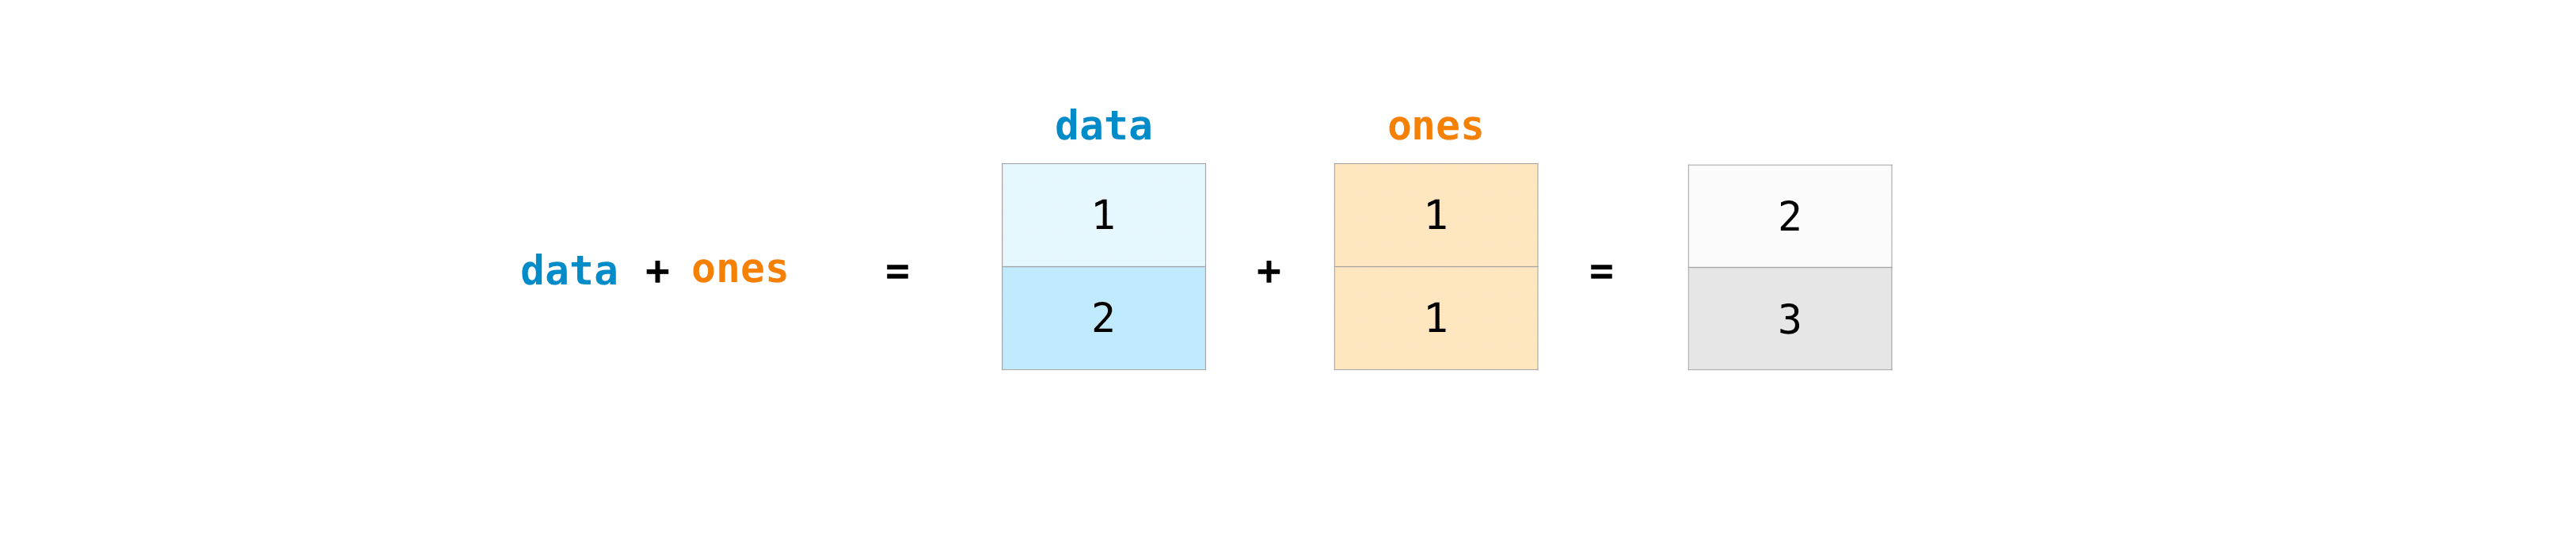

In [35]:
data - ones


array([0, 1])

In [36]:
data * data


array([1, 4])

In [37]:
data / data

array([1., 1.])

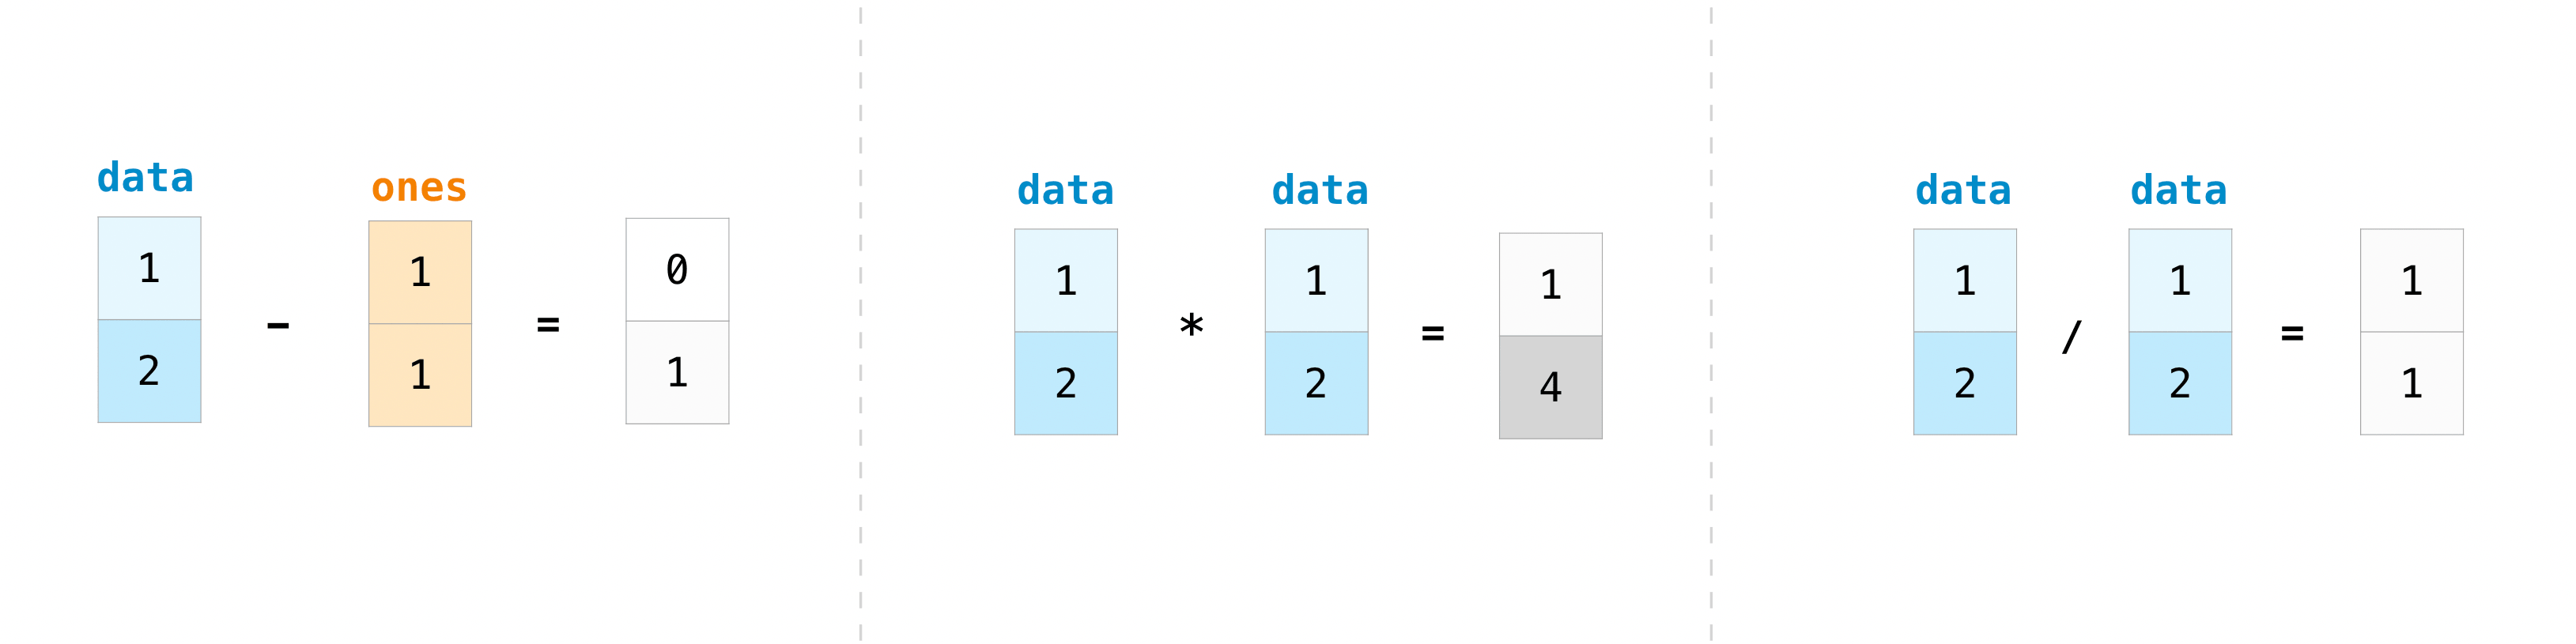


Basic operations are simple with NumPy. If you want to find the sum of the elements in an array, you’d use **sum()**. This works for 1D arrays, 2D arrays, and arrays in higher dimensions.



In [38]:
a = np.array([1, 2, 3, 4])
a.sum()

np.int64(10)

To add the rows or the columns in a 2D array, you would specify the axis.

If you start with this array:

In [39]:
b = np.array([[1, 1], [2, 2]])


In [40]:
b.sum(axis=0)

array([3, 3])

In [41]:
b.sum(axis=1)

array([2, 4])

## Broadcasting
There are times when you might want to carry out an operation between an array and a single number (also called an operation between a vector and a scalar) or between arrays of two different sizes. For example, your array (we’ll call it “data”) might contain information about distance in miles but you want to convert the information to kilometers. You can perform this operation with:

In [42]:
data = np.array([1.0, 2.0])
data * 1.6

array([1.6, 3.2])

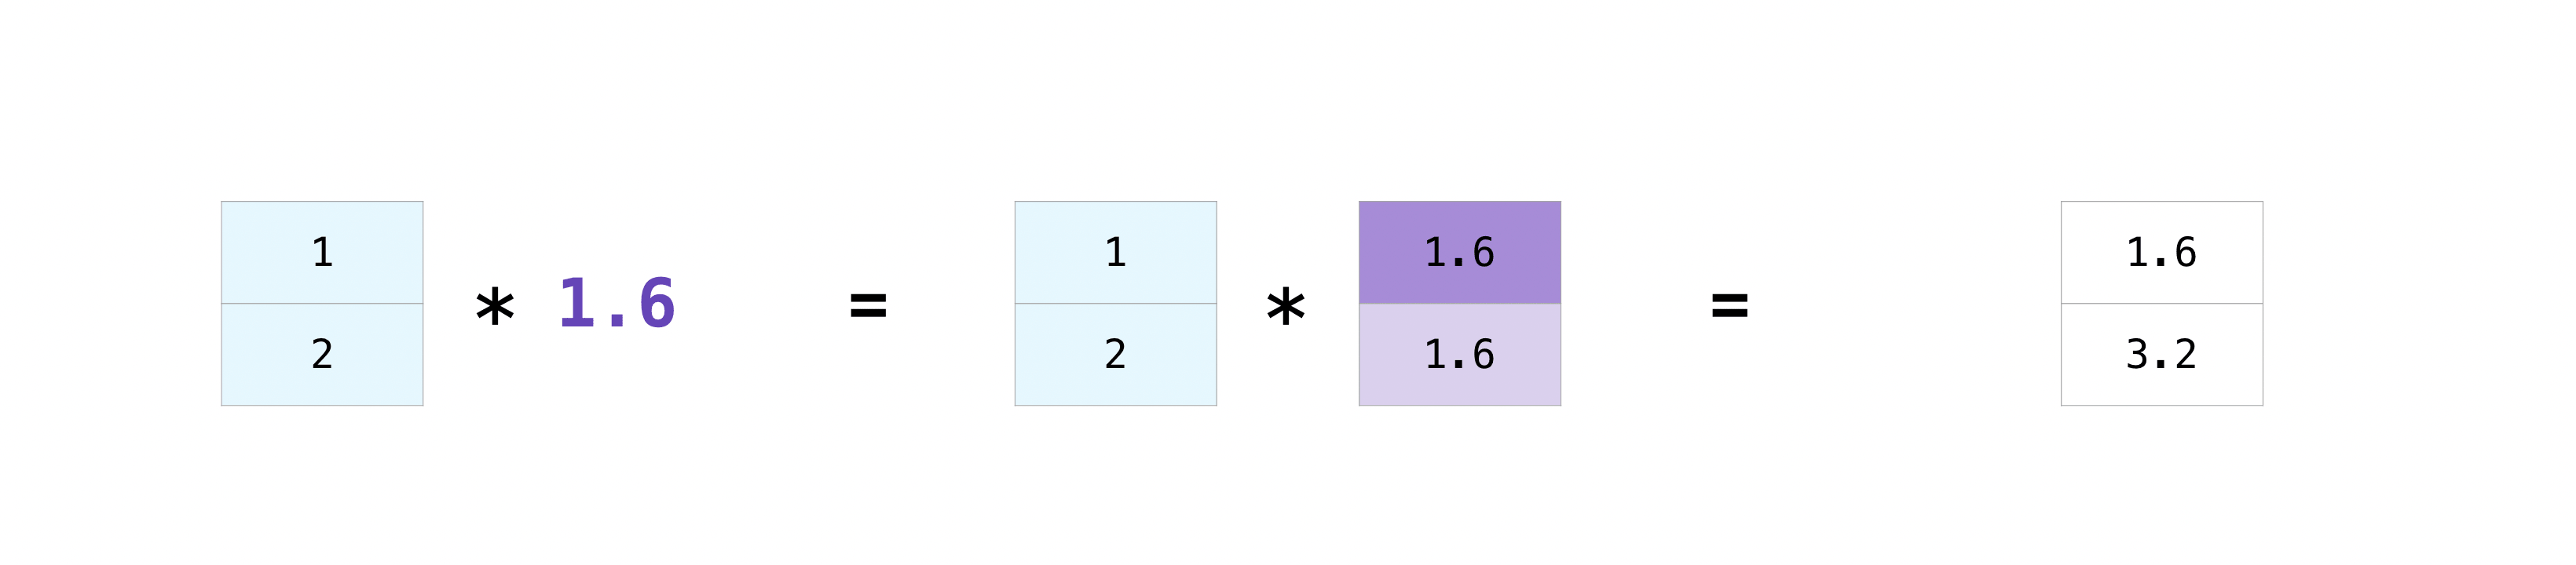

NumPy understands that the multiplication should happen with each cell. That concept is called broadcasting. Broadcasting is a mechanism that allows NumPy to perform operations on arrays of different shapes. The dimensions of your array must be compatible, for example, when the dimensions of both arrays are equal or when one of them is 1. If the dimensions are not compatible, you will get a ValueError.



## More useful array operations

NumPy also performs aggregation functions. In addition to **min**, **max**, and **sum**, you can easily run **mean** to get the average, **prod** to get the result of multiplying the elements together, **std** to get the standard deviation, and more.

In [43]:
data = np.array([1, 2, 3])
data.max()


np.int64(3)

In [44]:
data.min()


np.int64(1)

In [45]:
data.sum()

np.int64(6)

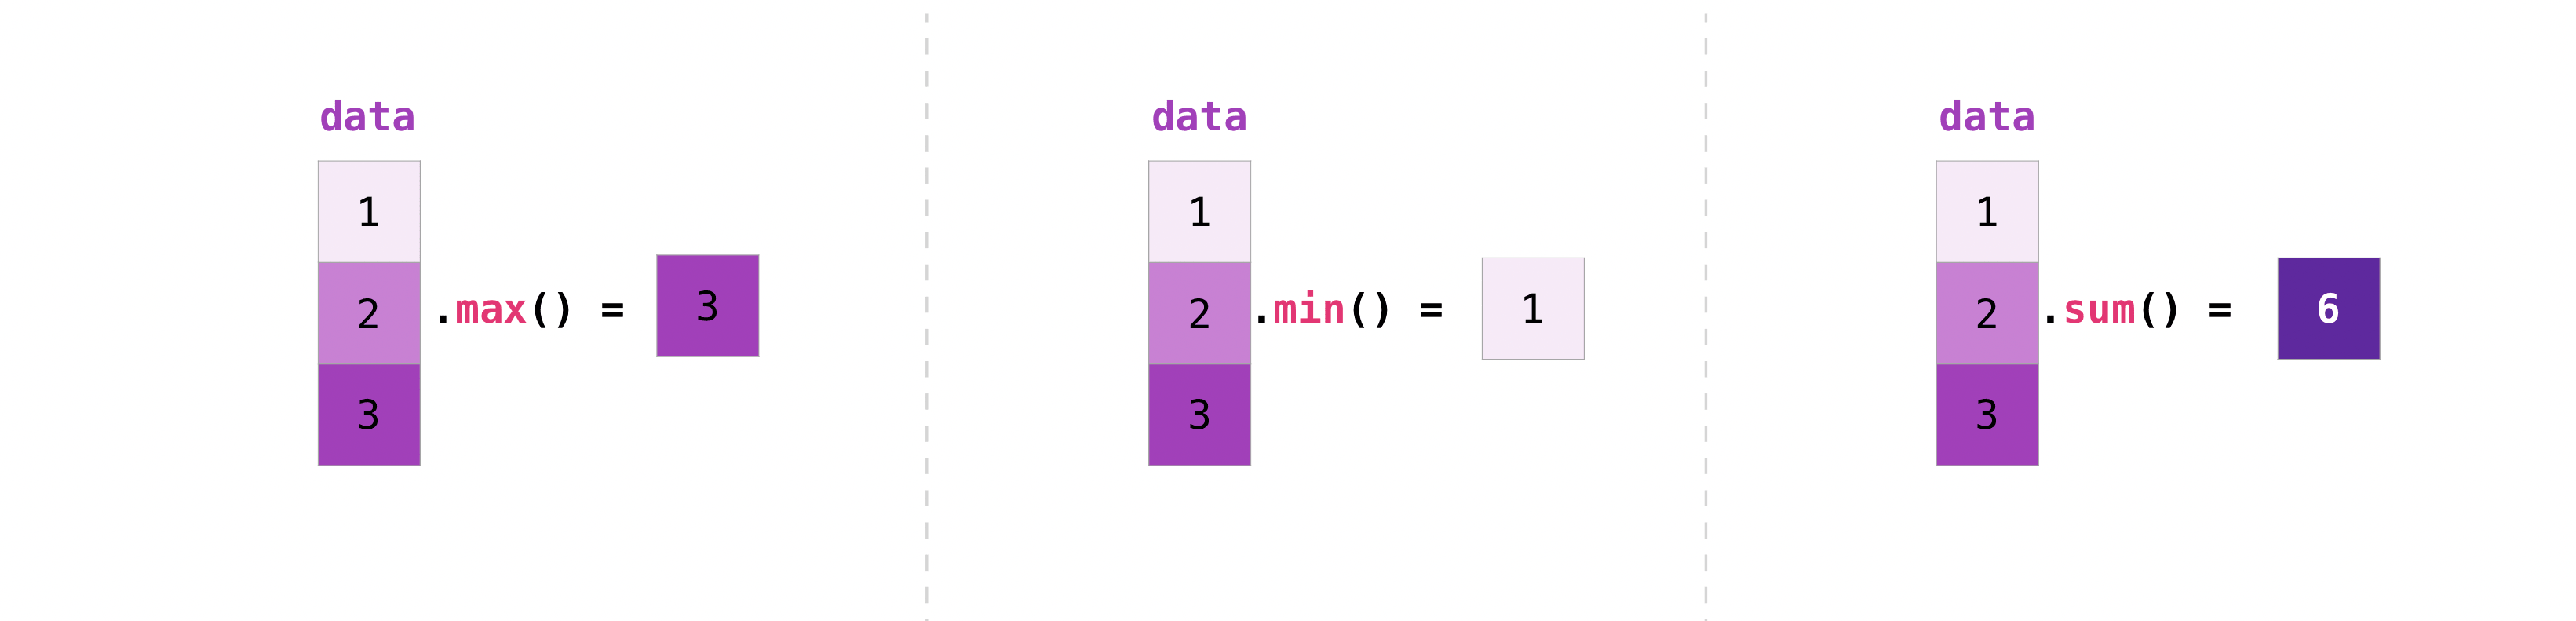

In [46]:
a = np.array([[0.45053314, 0.17296777, 0.34376245, 0.5510652],
              [0.54627315, 0.05093587, 0.40067661, 0.55645993],
              [0.12697628, 0.82485143, 0.26590556, 0.56917101]])

It’s very common to want to aggregate along a row or column. By default, every NumPy aggregation function will return the aggregate of the entire array. To find the sum or the minimum of the elements in your array, run:



In [47]:
a.sum()

np.float64(4.8595784)

In [48]:
a.min()

np.float64(0.05093587)

In [49]:
a.min(axis=0)

array([0.12697628, 0.05093587, 0.26590556, 0.5510652 ])

The four values listed above correspond to the number of columns in your array. With a four-column array, you will get four values as your result.